In [2]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

In [3]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [4]:
exp1 = np.fromfile('D://topgate.txt',dtype=float,count=-1, sep=" ")
#exp2 = np.fromfile('D://m.dat',dtype=float,count=-1, sep=" ")
#exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

In [5]:
#exp4 = np.reshape(exp4, (-1, 3))
#exp4=np.transpose(exp4)

In [6]:
exp1 = np.reshape(exp1, (19, -1))
#exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
#exp1=np.transpose(exp1)
#exp2 = np.reshape(exp2, (161, 201))


In [7]:
exp1.shape

(19L, 3001L)

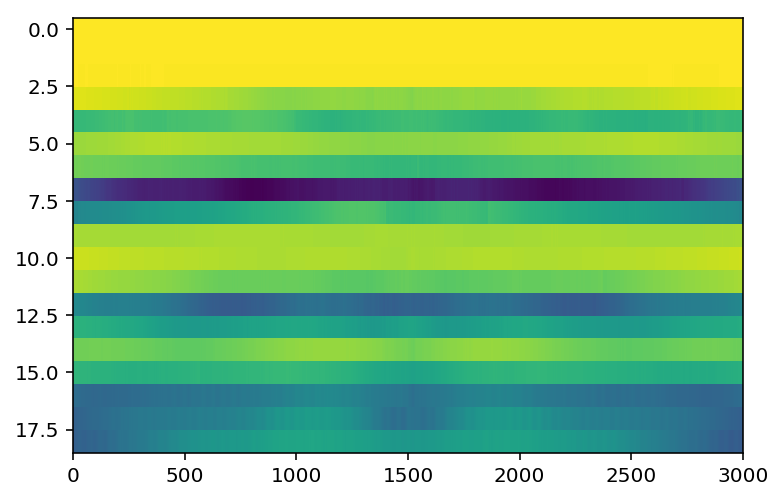

In [8]:
plt.imshow(exp1,aspect='auto')

In [9]:
for i in xrange(19):
    dat=baseline_als(exp1[i],10000,0.0001,100)
    exp1[i]=exp1[i]-dat

In [10]:
#exp1=np.transpose(exp1)
#for i in xrange(221):
#    exp3[i] = exp1[i]
#row_sums = exp1.sum(axis=1)
#new_matrix = exp1 / row_sums[:, numpy.newaxis]

In [11]:
new_matrix

NameError: name 'new_matrix' is not defined

In [ ]:

plt.imshow(exp1,cmap='Greys_r',aspect='auto')
#exp1[1].shape


In [ ]:
#!/usr/bin/env python
#<examples/doc_basic.py>
a=np.linspace(0, 0, num=19)
b=np.linspace(0, 0, num=19)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(0,19):
    
    x=np.linspace(-0.8, -1.8, num=3001)
    data=exp1[i,:]*1E9
    res=np.linspace(4.2, 3.6, num=3001)
    #A=0.0082666210081654996
    #B=-7.0864837737938933e-05
    f=444
    def fcn2min(params, x, data):
        A = params['A']
        B = params['B']
    #    f = params['f']
        p = params['p']
    #    C = params['C']
        res=A+B*np.sin(f*x+p)
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('A',   value= 0.018244542650490869)
    params.add('B', value=-0.0029161735691139233)
#    params.add('f',   value= 444)
#    params.add('C',   value= 0)
    params.add('p', value= 0)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    plt.xlim(-1.4,-1.2)
    params2=result.params
    v = params2.valuesdict()
    a[i]=v['p']
    b[i]=v['B']
#    b[i]=v['B']
#plt.savefig('D:\\sl2.pdf', format='pdf')

In [ ]:
params2

In [51]:
plt.imshow(new_matrix,aspect='auto')
plt.xlim=(1000,2000)

NameError: name 'new_matrix' is not defined

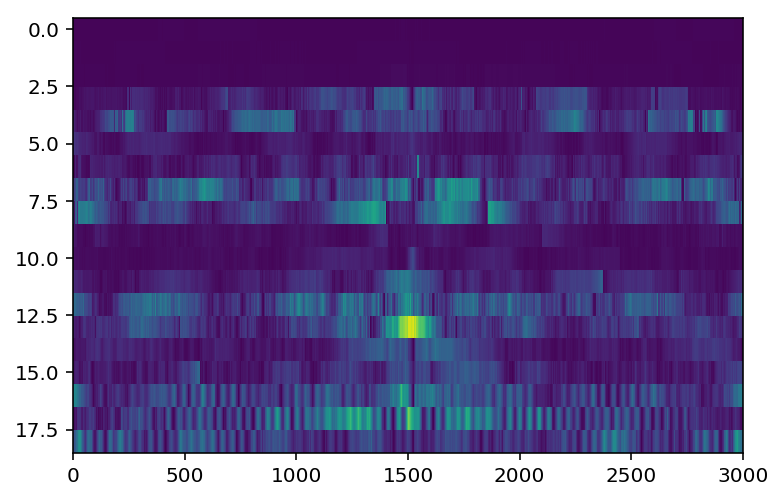

In [55]:
plt.imshow(exp1, aspect='auto'
          )

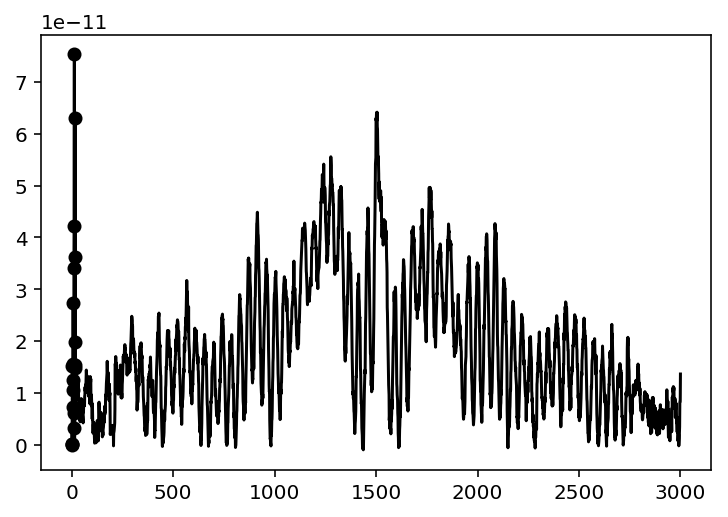

In [24]:
plt.plot(exp1[:,1500],'o-k')
plt.plot(exp1[17],'-k')

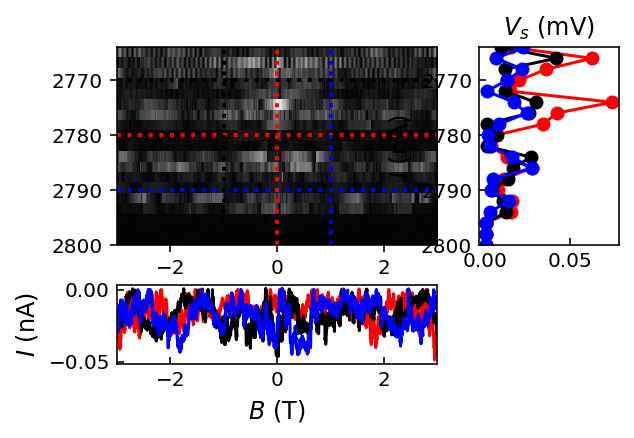

In [83]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])
plt.imshow(exp1*1E9, cmap='gray',extent=[-3,3,2800,2764], origin="lower",aspect='auto')
plt.axhline(y=2770, color='k', linestyle='dotted',lw=2)
plt.axhline(y=2780, color='r', linestyle='dotted',lw=2)
plt.axhline(y=2790, color='b', linestyle='dotted',lw=2)
plt.axvline(x=-1, color='k', linestyle='dotted',lw=2)
plt.axvline(x=0, color='r', linestyle='dotted',lw=2)
plt.axvline(x=1, color='b', linestyle='dotted',lw=2)
ax2 = plt.subplot(gs[0:2, 2])
x1=np.linspace(2800, 2764, num=19)
plt.plot(exp1[:,1500]*1E9,x1,'o-r')
plt.plot(exp1[:,1200]*1E9,x1,'o-k')
plt.plot(exp1[:,500]*1E9,x1,'o-b')
plt.ylim(2800,2764)
plt.tick_params(direction='in',labeltop=False)
#plt.yticks([0,1,2],fontsize=10)
plt.title("$V_s$ (mV)", color='k',fontsize=12)
plt.ylabel("$I$ (nA)", color='k',fontsize=12)
#plt.ylim(0,2)
ax3 = plt.subplot(gs[2, 0:2])
x2=np.linspace(-3, 3, num=3001)

plt.plot(x2,exp1[18]*-1E9,'-r')
plt.plot(x2,exp1[12]*-1E9,'-k')
plt.plot(x2,exp1[7]*-1E9,'-b')
#plt.ylim(0,2)
plt.xlim(-3,3)
plt.tick_params(direction='in')
#plt.yticks([0,1,2],fontsize=10)
plt.xlabel("$B$ (T)", color='k',fontsize=12)
plt.ylabel("$I$ (nA)", color='k',fontsize=12)


plt.savefig('D:\\topgate.pdf',bbox_inches='tight', format='pdf',dpi=900)

In [ ]:

#for i in range(0,201):
#    plt.plot(expp1[i])
x=np.linspace(-2, -1.4, num=19)
plt.plot(x,(a),'o-')
#plt.plot(exp4[0],exp4[1]*4E9,'r')
#plt.xlim(-2,-1.4)
#plt.ylim(-3,3)
#plt.plot(x,(np.transpose(expp1))[9]*1E9, '-k')
np.savetxt('D:\\pha', a, delimiter=' ') 

In [ ]:
plt.plot(x,b,'o-')

In [ ]:
x=np.linspace(-0.8, -1.8, num=300)
plt.plot(x, expp1[70], 'r')

np.savetxt('D:\\fit1', expp1[10], delimiter=' ') 

In [ ]:
expp1[10].shape

In [ ]:
plt.imshow(expp1)

In [ ]:
plt.imshow(expp1)

NameError: name 'exp3' is not defined

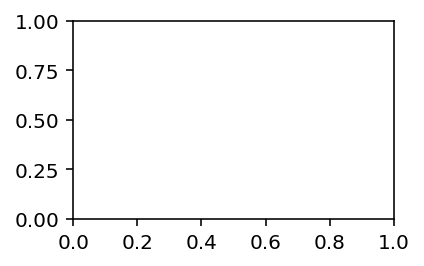

In [12]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')
import matplotlib.patches as patches

fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp3*1E9, interpolation='none', aspect='auto',cmap='Greys_r', extent=[-1.75,-1.25,-1.5,-1.72])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.5,-1.6,-1.7],fontsize=8)
plt.xticks([-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
#plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=8)
#plt.xlabel("$V_{2}$ (V)", color='k',fontsize=12)
plt.xlim(-1.75,-1.25)
plt.ylim(-1.72,-1.50)

ax4 = plt.subplot(gs[0:2:, 2])

xxx=np.linspace(-1.72, -1.5, num=221)
#x6=np.linspace(-2., -0.8, num=251)
plt.plot((a-2)*-1/3.14,xxx,'-k')

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
#xt=np.linspace(0, 0.5, num=4)
#plt.text(1, -0.95, '(2)',color='k', rotation=0,fontsize=8)
plt.title('$\phi$ ($\pi$)', color='black',fontsize=10)
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
#plt.xticks(np.arange(xt.min(), xt.max(),0.2),fontsize=6)

# P.arrow( x, y, dx, dy, **kwargs )


plt.annotate('1st', xy=(3,-1.72), xytext=(3,-1.72),color='#000080',fontsize=8)
plt.annotate('2nd', xy=(3,-1.62), xytext=(3,-1.61),color='#4682B4',fontsize=8)
plt.annotate('3rd', xy=(2,-1.52), xytext=(3,-1.5),color='#00BFFF',fontsize=8)

#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
plt.xlim(-1.5,1.5)
plt.ylim(-1.72,-1.50)

ax4.add_patch(patches.Rectangle(
        (-3, -1.675), 6, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-3, -1.587), 6, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-3, -1.5), 6, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))
#########################################
##########################################
ax1 = plt.subplot(gs[2:4, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp1*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmax=0.50,vmin=0.01, extent=[-1.75,-1.25,-1.5,-1.72])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.675, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.587, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.5,-1.6,-1.7],fontsize=8)
plt.xticks([-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
#plt.xticks(np.arange(xt.min(), xt.max(),-2),fontsize=8)
plt.xlabel("$V_{2}$ (V)", color='k',fontsize=10)
plt.xlim(-1.75,-1.25)
plt.ylim(-1.72,-1.5)


ax4 = plt.subplot(gs[2:4, 2])

plt.plot(exp4[1]*1E9,exp4[0],'-k')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 70, num=4)
plt.xlabel('$I$ (nA)', color='black',fontsize=10)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.xticks(np.arange(xt.min(), xt.max(),30),fontsize=8)
#plt.annotate('1st', xy=(2,-1.72), xytext=(2.1,-1.70),color='black')
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2.1,-1.59),color='blue')
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2.1,-1.48),color='red')
plt.xlim(0,3E1)
plt.ylim(-1.75,-1.50)
ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))






plt.savefig('D:\\test\\phase2.pdf',bbox_inches='tight', format='pdf',dpi = 1000)